<a href="https://colab.research.google.com/github/Faouzi-Slimi/Project/blob/main/project_Political_Posta_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing

In [1]:
# Import Data 

import pandas as pd
import numpy as np

Political = pd.read_excel("/content/drive/MyDrive/political.xlsx")
NA_Political = pd.read_excel("/content/drive/MyDrive/na_political.xlsx")

In [2]:
Political.head(1)

,Date/Time,Message,Title,Description,Rating,Shares,Comments,Reactions,Likes,Loves,...,Cares,Facebook Page,Facebook Group,Collections,CT Type,Link (Original),Subscriber count,CT Score,Type,[Political Content]
0,2022-05-25 00:04:06,اي كانت النتائج يبقى الراجل راجل و الطبوبي طبو...,NaN,NaN,597.0,340,868,833,388,36,...,8,تحالف أحرار,NaN,{Referendum - Constitution},native_video,https://www.facebook.com/105582455305515/video...,NaN,5.16,Video,Political


In [3]:
NA_Political.head(1)

,Date/Time,Message,Title,Description,Rating,Shares,Comments,Reactions,Likes,Loves,...,Cares,Facebook Page,Facebook Group,Collections,CT Type,Link (Original),Subscriber count,CT Score,Type,[Political Content]
0,2022-05-25 08:58:39,في #بنزرت كيف تبدا #أستاذ يحبوك تلامذتك هكا يس...,NaN,NaN,377.2,230,92,1173,666,472,...,31,Tuniflix,NaN,{Referendum - Constitution},native_video,https://www.facebook.com/Tuniflix/videos/55927...,377953.0,7.59,Video,NaN


In [4]:
# Extract Colone Message

Political_Data = pd.DataFrame(Political["Message"])
NA_Political_Data = pd.DataFrame(NA_Political["Message"])

In [5]:
# Drop Na Value

Political_Data = Political_Data.dropna().reset_index(drop=True)
NA_Political_Data = NA_Political_Data.dropna().reset_index(drop=True)

In [6]:
# Drop dims
Political_Data = np.squeeze(Political_Data)
NA_Political_Data = np.squeeze(NA_Political_Data)


In [7]:
len(Political_Data)

2959

In [8]:
# All Data
import re 

lables_0 = np.asarray(np.zeros(len(NA_Political_Data)))
lables_1 = np.asarray(np.ones(len(Political_Data)))
lables = np.concatenate((lables_0,lables_1),axis=0) 

data = np.concatenate((NA_Political_Data,Political_Data),axis=0)

for i in range(len(data)):
  data[i] = re.sub(r'[a-zA-Z?]', '', data[i])
  data[i] = s = re.sub("(\s\d+)","", data[i])


from sklearn.utils import shuffle
x, y = shuffle(data,lables, random_state=0)

x = np.asarray(x)
y = np.asarray(y)

In [9]:
x[1:20]

array(['في #الكبش_يدور تشطح بالمحارم فرحانة بعلوش العيد',
       'ويتوقّع مزيد تدهورها',
       '🔴 مواطن. يشد جوهر بن مبارك يمسح بيه القاعة وهو هارب 😂😂😂',
       '🔴تنبيه : للإخوة و الأخوات الناشطين في #الجمعيات اللى يتصدقو بالخرفان🐏🐑 بطبيعة الحال موش من مالهم الخاص بل وسيط خير بين المتصدق و المحتاج من فضلكم من غير ما تمشيو في واحد ولابسين مراول وجيليات عليها شعارات جمعياتكم وتوقفو قدام دار المسكين باش تعطوه العلوش ... وووو عيطو لمولى الدار يجي يهزو لولادو عبارة هو شراه بش يفرحو ولادو ومن غير ما تسببلو إحراج وتكسرو خاطر الراجل قدام ولادو ومرتو ومن غير لاجيليات ولا تصاور ولا إشهار بارك الله فيكم وربي يجازيكم بالإحسان ❤️❤️',
       '🔴الإضراب العام لا يمثلني#جوان_يوم_عمل #تونس_فوق_الجميع ✌🇹🇳',
       'انقلاب يبدد الأموال في سبيل تكريس كل السلطات بيد زعيم مستبد مريض بهوس السلطة.. قاطع ولا تكن شريكا في الجريمة',
       '#سوسة :#حجز قرص "إكستازي" داخل" لواج"...التفاصيل في اول تعليق #بلاقناع #',
       'وصول الرئيس راشد الغنوشي إلى قطب مكافحة الإرهاب بتونس 🇹🇳',
       "منى كريم: مشروع الدستور 

In [10]:
y[1:20]

array([0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1.])

##CountVectorizer

In [11]:
##### Vectorizer :

# Download Stop Words

import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
arabic_stop_words = stopwords.words('arabic')


#l = ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'ان', 'انفك', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظل', 'ظن', 'عد', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء']
#arabic_stop_words = np.asarray(np.concatenate((arabic_stop_words,l),axis=0))

print(arabic_stop_words)


['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words=arabic_stop_words,binary = True)

df =pd.DataFrame( vectorizer.fit_transform(data).toarray(),columns=vectorizer.get_feature_names())



/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'ان', 'انفك', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظل', 'ظن', 'عد', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
df.columns

Index(['00', '001', '002', '00س', '01', '015', '02', '03', '04', '05',
       ...
       'ﻭﻟﻜﻦ', 'ﻳﻌﻠﻖ', 'ﻳﻤﻜﻨﻚ', 'ﻳﻨﺒﻐﻲ', 'ﻳﻮﺟﺪ', 'ﻷﺧﺬ', '𝒘𝒊𝒎𝒃𝒍𝒆𝒅𝒐𝒏',
       '𝗙𝗘𝗦𝗧𝗜𝗩𝗔𝗟', '𝗙𝗟𝗔𝗦𝗛', '𝗜𝗡𝗙𝗢'],
      dtype='object', length=35584)

In [14]:
df2 = df.groupby(['ﻳﻤﻜﻨﻚ'])['ﻳﻤﻜﻨﻚ'].count()
df2

ﻳﻤﻜﻨﻚ
0    5905
1       1
Name: ﻳﻤﻜﻨﻚ, dtype: int64

##Pca

In [15]:
# install pca package

! pip install pca


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=e239bfc2131a05e2e64e0b557aa455013e6706760f6c81772209244cd6998f76
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=aabf310763ac928bffd904fac573258598c19fcd1bb7c36790af1e576cf58961
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=bd4b287948a47200d6560fc947b0ed52abdcb7769bf64b203dc8250fef61a613
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built adjustText sklearn wget


[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [35584] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2886] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [35584] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2886]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


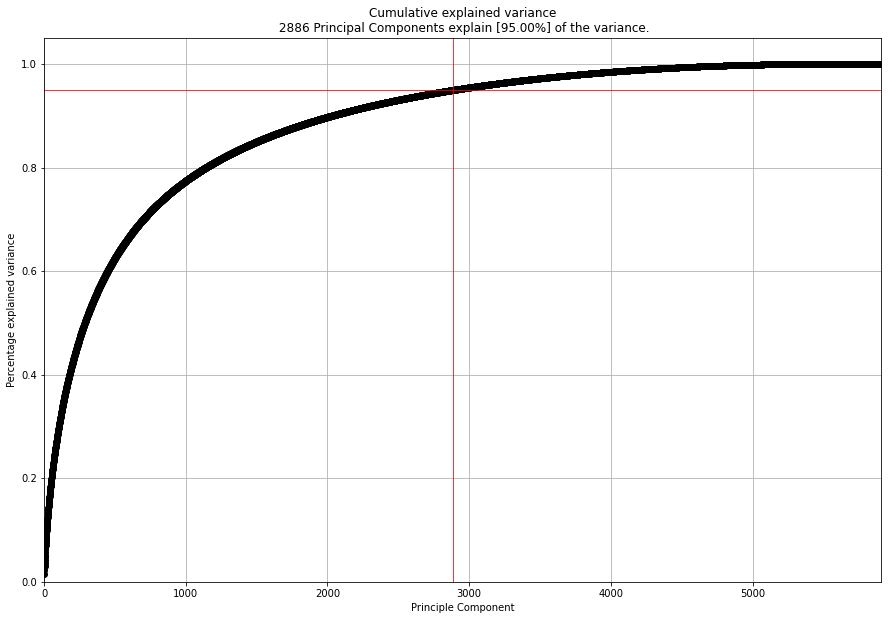

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [5906] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [5906] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


<Figure size 432x288 with 0 Axes>

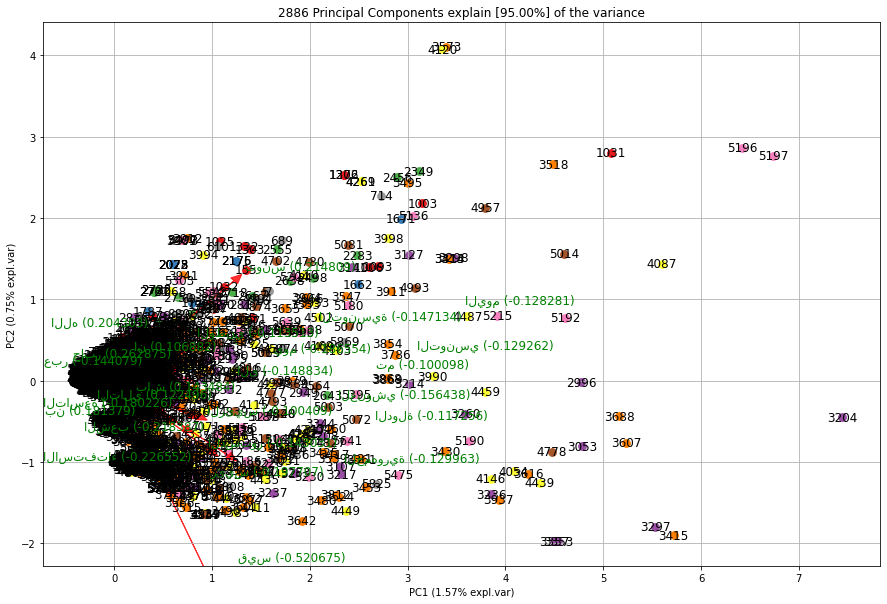

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [5906] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [5906] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


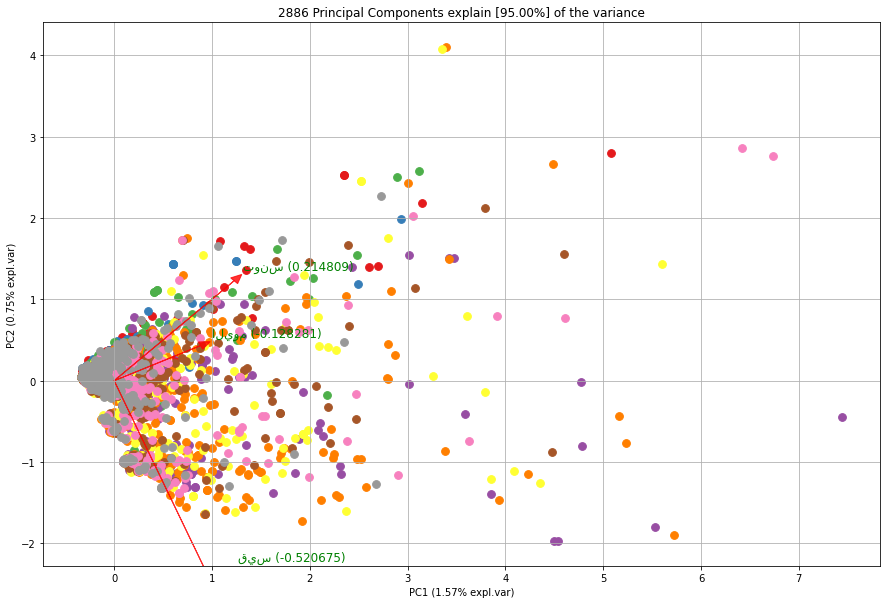

[pca] >Plot PC1 vs PC2 with loadings.
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


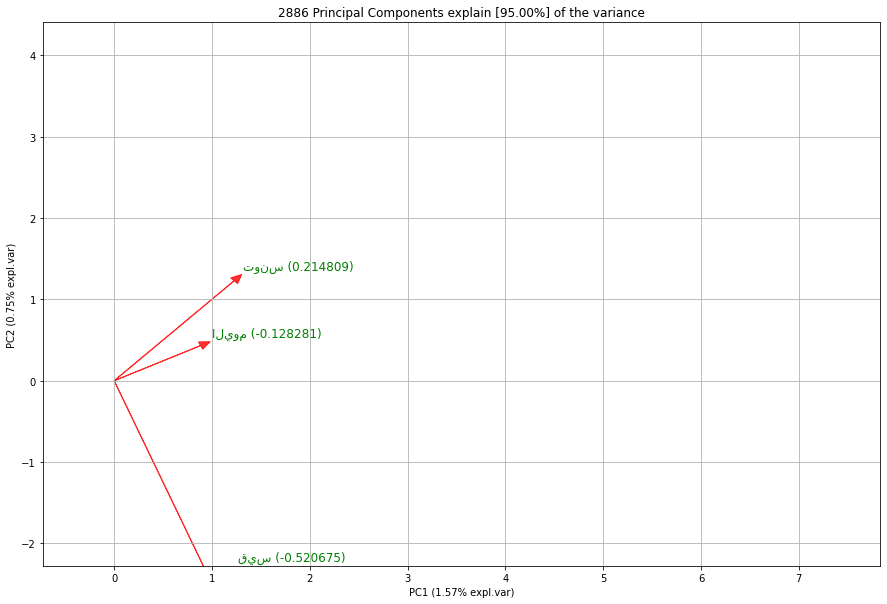

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


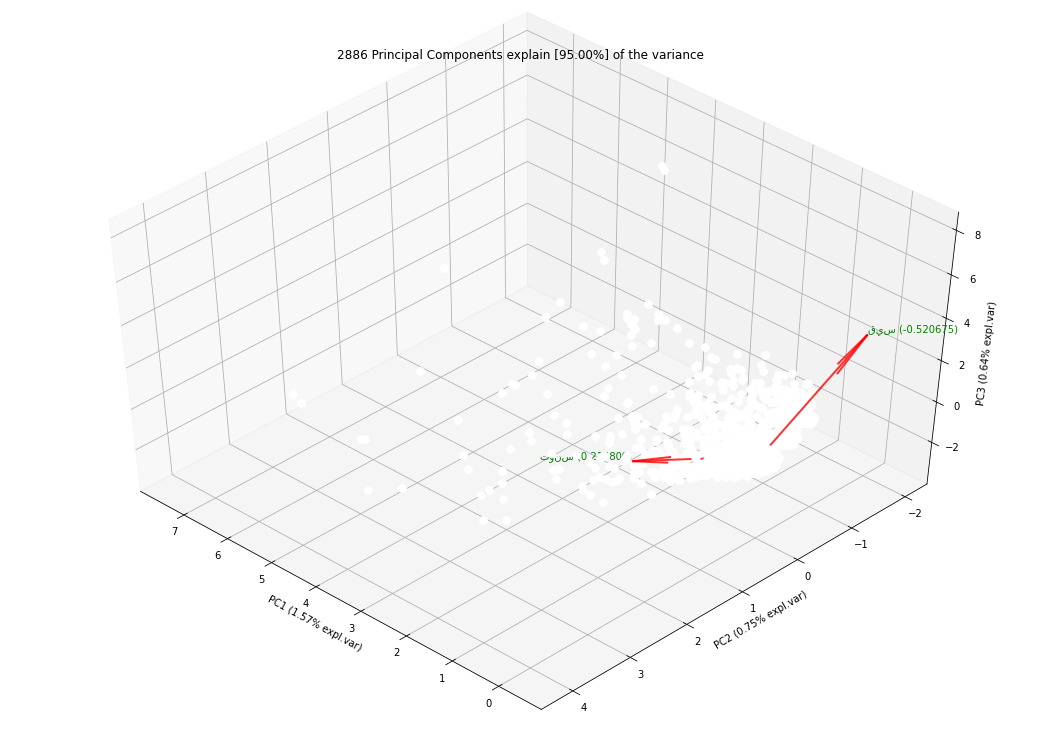

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7fd1d3f29b10>)

In [16]:
from pca import pca
model = pca()
# Fit transform data
results = model.fit_transform(df)
# Extract the most informative features
results['topfeat']

#     PC feature   loading  type
# 0  PC1  feat_1 -0.997830  best
# 1  PC2  feat_2 -0.997603  best
# 2  PC3  feat_3  0.998457  best
# 3  PC4  feat_4  0.997536  best
# 4  PC5  feat_5 -0.952390  best
# 5  PC6  feat_6 -0.955873  best
# 6  PC7  feat_7 -0.994602  best
# 7  PC1  feat_8 -0.000000  weak

# Plot the explained variance
model.plot()
# Biplot with the loadings
ax = model.biplot(legend=False)
# Biplot with the loadings
ax = model.biplot(n_feat=3, legend=False, label=False)
# Cleaning the biplot by removing the scatter, and looking only at the top 3 features.
ax = model.biplot(n_feat=3, legend=False, label=False, cmap=None)
# Make plot with 3 dimensions
model.biplot3d(n_feat=3, legend=False, label=False, cmap=None)

## chi-deux

In [25]:
from sklearn.feature_selection import chi2

ch2_statistique,chi2_pvalue = chi2(df,lables)

In [28]:
chi2_pvalue.max()

0.9977073214829311

In [34]:
s = 0
for i in chi2_pvalue :
  if i <0.05 :
    s=s+1
s    

3048

In [41]:
# select futuer :

cols = vectorizer.get_feature_names()
new_cols = []

for i in range(len(chi2_pvalue)):
  if chi2_pvalue[i] < 0.05 :
    new_cols.append(cols[i])

new_cols


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '04',
 '20',
 '216',
 '25',
 '264',
 '35',
 '39',
 '40',
 '425',
 '566',
 '571',
 '58',
 '60',
 '666',
 '75',
 '977',
 'آفاق',
 'آفاق_تونس',
 'آل',
 'آمن',
 'أبهم',
 'أتجاه',
 'أجهزة',
 'أحترم',
 'أحدث',
 'أحرار',
 'أحزاب',
 'أحكام',
 'أخبار_تونس',
 'أختان',
 'أخطاء',
 'أخطر',
 'أخوة',
 'أخيه',
 'أداء',
 'أدعوكم',
 'أدكن',
 'أدلة',
 'أدنى',
 'أدوات',
 'أراد',
 'أرباحك',
 'أرسلت',
 'أرصدة',
 'أرضية',
 'أزمة',
 'أسئلة',
 'أسابيع',
 'أساس',
 'أستاذ',
 'أستلقي',
 'أسعار',
 'أسكنه',
 'أصبحنا',
 'أصرت',
 'أصلها',
 'أصوات',
 'أصيل',
 'أصيلتا',
 'أضحية',
 'أطراف',
 'أطفال',
 'أعداء',
 'أعضاء',
 'أعضائها',
 'أعلن',
 'أعوذ',
 'أعين',
 'أغلبية',
 'أقاربها',
 'أقسم',
 'أقول',
 'أكبر',
 'أكد',
 'ألغى',
 'ألفة',
 'ألم',
 'أليم',
 'أماني',
 'أمتار',
 'أمر',
 'أمرهم',
 'أمطار',
 'أمك',
 'أمه',
 'أمها',
 'أموال',
 'أموالا',
 'أمور',
 'أمي',
 'أميمة',
 'أمين',
 'أنس',
 'أنس_جابر',
 'أنستالينغو',
 'أنصار',
 'أنصاره',
 'أنفسهم',
 'أننا',
 'أنهم',
 'أني',
 'أهالي',
 'أهداف',
 'أهله',
 'أهلها',
 'أو

In [42]:
data = df[new_cols]

In [48]:
s0 = 0
s1 = 0
for i in lables :
  if i == 0 :
    s0 += 1
  else :
    s1 += 1  
s0,s1    

(2947, 2959)

## Model For Classification 

In [50]:
# split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( data,lables, test_size=0.2, random_state=42)

X_valid, X_test, y_valid ,y_test = train_test_split( X_test,y_test, test_size=0.2, random_state=42)

In [52]:
X_train.shape,len(X_train)

((4724, 3048), 4724)

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(16, input_shape=(3048,), activation='relu')) # Add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
# now we just update our model fit call
history = model.fit(X_train,y_train,
                    epochs=11, # you can set this to a big number!
                    batch_size=10,
                    validation_data=(X_valid,y_valid),
                    shuffle=True,
                    verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                48784     
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 49,073
Trainable params: 49,073
Non-trainable params: 0
_________________________________________________________________
Epoch 1/11
473/473 [==============================] - 2s 4ms/step - loss: 0.4378 - accuracy: 0.8239 - val_loss: 0.2584 - val_accuracy: 0.8889
Epoch 2/11
473/473 [==============================] - 2s 3ms/step - loss: 0.2136 - accuracy: 0.9138 - val_loss: 0.2336 - val_accuracy: 0.9101
Epoch 3/11
473/473 [==========

In [59]:
model.evaluate(X_test,y_test)

8/8 [==============================] - 0s 5ms/step - loss: 0.2704 - accuracy: 0.9367


[0.27038079500198364, 0.9367088675498962]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


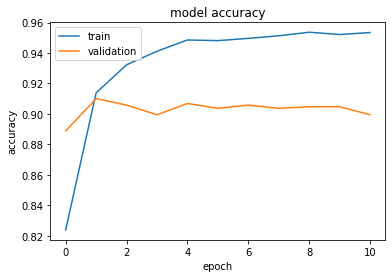

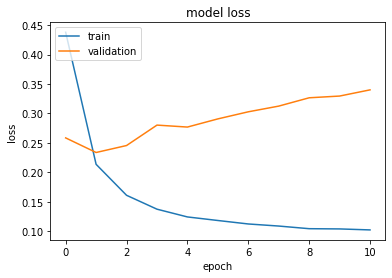

In [66]:
import matplotlib.pyplot as plt
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()